### Verify Installation

In [30]:
!pip install torchsummary

In [1]:
import torch

# get Pytorch version
torch.__version__

'1.13.0'

In [2]:
# import torchvision
import torchvision

# get torchvision version
torchvision.__version__

'0.14.0'

In [3]:
# checking if cuda is available
torch.cuda.is_available()

True

In [4]:
# get number of cuda/gpu devices
torch.cuda.device_count()

1

In [5]:
# get cuda/gpu device id
torch.cuda.current_device()

# get cuda/gpu device name
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [7]:
device = torch.device("cuda:0")

props = torch.cuda.get_device_properties(device)
print(props.total_memory / (1024**3))

15.8992919921875


### Tesnor Data Type

In [8]:
# define a tensor with default data type
x = torch.ones(2, 2)
print(x)
print(x.dtype)


tensor([[1., 1.],
        [1., 1.]])
torch.float32


### Specify Data Type

In [9]:
# define a tensor
x = torch.ones(2, 2, dtype=torch.int8)
print(x)
print(x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


### Change Tensor data type

In [10]:
# define a tensor with type torch.uint8
x=torch.ones(1,dtype=torch.uint8)

print(x.dtype)
# change a tesnor data type
x=x.type(torch.float)
print(x.dtype)

torch.uint8
torch.float32


### Converting Tensors to NumPy arrays

In [11]:
# define a tensor
x=torch.rand(2,2)
print(x)
print(x.dtype)

# convert tensor to numpy array
y=x.numpy()
print(y)
print(y.dtype)

tensor([[0.6160, 0.8376],
        [0.6996, 0.7589]])
torch.float32
[[0.6160082  0.8376493 ]
 [0.6996231  0.75891566]]
float32


### Converting NumPy arrays to Tensors

In [12]:
# import NumPy
import numpy as np

# define a NumPy array
x=np.zeros((2,2),dtype=np.float32)
print(x)
print(x.dtype)

# convert array to PyTorch Tensor
y=torch.from_numpy(x)
print(y)
print(y.dtype)

[[0. 0.]
 [0. 0.]]
float32
tensor([[0., 0.],
        [0., 0.]])
torch.float32


### Move Tensors between devices

In [13]:
# define a tensor
x=torch.tensor([1.5, 2])
print(x)

print(x.device)

tensor([1.5000, 2.0000])
cpu


In [14]:
# move tensor onto GPU
# define a cuda/gpu device
device = torch.device("cuda:0")
x = x.to(device)
print(x)
print(x.device)

tensor([1.5000, 2.0000], device='cuda:0')
cuda:0


In [15]:
# move tensor onto cpu
# define a cpu device
device = torch.device("cpu")
x = x.to(device)
print(x)
print(x.device)

tensor([1.5000, 2.0000])
cpu


In [16]:
# define a tensor on device
device = torch.device("cuda:0")
x = torch.ones(2,2, device=device)
print(x)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')


## Loading and Processing Data

In [17]:
from torchvision import datasets

# path to store data and/or load from
path2data="./data"

# loading training data
train_data=datasets.MNIST(path2data, train=True, download=True)

# extract data and targets
x_train, y_train=train_data.data,train_data.targets
print(x_train.shape)
print(y_train.shape)

# loading validation data
val_data=datasets.MNIST(path2data, train=False, download=True)

# extract data and targets
x_val,y_val=val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


### Display images

torch.Size([60000, 1, 28, 28])
torch.Size([3, 152, 242])


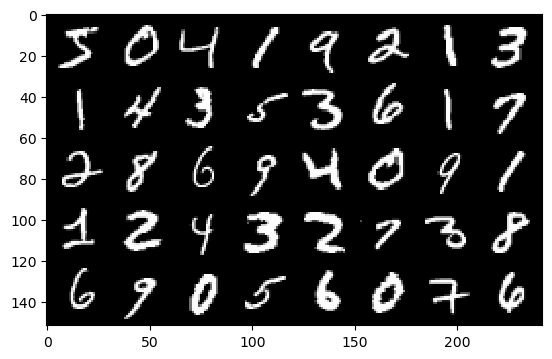

In [18]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# First, add a dimension to tensor to become B*C*H*W
if len(x_train.shape)==3:
    x_train=x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape)==3:
    x_val=x_val.unsqueeze(1)

# make a grid of 40 images, 8 images per row
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

# helper function to display images
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    
    # Convert to H*W*C shape
    npimg_tr=np.transpose(npimg, (1,2,0))
    
    # display images
    plt.imshow(npimg_tr,interpolation='nearest')

# call helper function
show(x_grid)

### Transform Data

In [19]:
from torchvision import transforms

# loading MNIST training dataset
train_data=datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=1),
                                    transforms.RandomVerticalFlip(p=1),
                                    transforms.ToTensor(),
                                    ])



Text(0.5, 1.0, 'transformed')

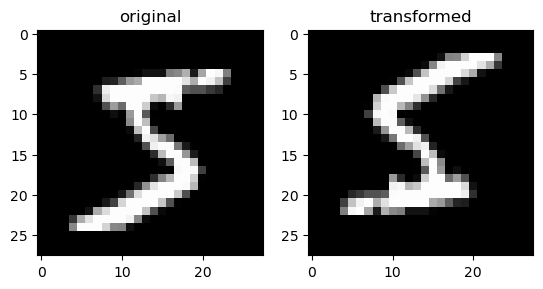

In [20]:
# get a sample image from training dataset
img = train_data[0][0]

# tranform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray");
plt.title("transformed")

In [21]:
# define transformations
data_transform = transforms.Compose([
                                        transforms.RandomHorizontalFlip(1),
                                        transforms.RandomVerticalFlip(1),
                                        transforms.ToTensor(),])

# Loading MNIST training data with on-the-fly transformations
train_data=datasets.MNIST(path2data, train=True, download=True,
transform=data_transform )

### Wrap Tensors into Dataset

In [22]:
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds:
    print(x.shape,y.item())
    break

torch.Size([1, 28, 28]) 5


### Iterate Over Dataset

In [23]:
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb,yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break
    # your training code will be here!

torch.Size([8, 1, 28, 28])
torch.Size([8])


## Building Models

In [24]:
from torch import nn

# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)

# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear(1000, 100)

# output of the linear layer
output = linear_layer(input_tensor)
print(output.size())

torch.Size([64, 100])


### Define models using nn.Sequential

In [25]:
from torch import nn

# define a two-layer model
model = nn.Sequential(
                        nn.Linear(4, 5),
                        nn.ReLU(), # relu is not shown in the figure.
                        nn.Linear(5, 1),)
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


## Define models using nn.Module

In [26]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5, 1)
        self.conv2 = nn.Conv2d(8, 16, 5, 1)
        self.fc1 = nn.Linear(4*4*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
print(model)


Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


### Move Model to Device

In [27]:
print(next(model.parameters()).device)

cpu


In [28]:
device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)

cuda:0


### Show model summary

In [31]:
from torchsummary import summary

summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
            Linear-4                   [-1, 10]           1,010
Total params: 30,134
Trainable params: 30,134
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


## Loss Function

In [32]:
# define the negative log likelihood loss
loss_func = nn.NLLLoss(reduction="sum")

for xb, yb in train_dl:
    # move batch to cuda device
    xb=xb.type(torch.float).to(device)
    yb=yb.to(device)
    # get model output
    out=model(xb)
    # calculate loss value
    loss = loss_func(out, yb)
    print (loss.item())
    break

118.3739242553711


In [33]:
# compute gradients
loss.backward()

## Optimizer

In [34]:
from torch import optim

# define Adam optimizer
opt = optim.Adam(model.parameters(), lr=1e-4)

# update model parameters
opt.step()

# set gradients to zero
opt.zero_grad()

## Training and Validation

In [35]:
import numpy as np

def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

def loss_batch(loss_func, xb, yb,yb_h, opt=None):
    
    # obtain loss
    loss = loss_func(yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch(yb,yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), metric_b


def loss_epoch(model,loss_func,dataset_dl,opt=None):
    loss=0.0
    metric=0.0
    len_data=len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb=xb.type(torch.float).to(device)
        yb=yb.to(device)
        
        # obtain model output
        yb_h=model(xb)

        loss_b,metric_b=loss_batch(loss_func, xb, yb,yb_h, opt)
        loss+=loss_b
        if metric_b is not None:
            metric+=metric_b
    loss/=len_data
    metric/=len_data
    return loss, metric



def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,opt)
        
            
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl)
        
        accuracy=100*val_metric

        print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss,val_loss,accuracy))

In [36]:
import numpy as np


# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.339111, val loss: 0.166871, accuracy: 94.20
epoch: 1, train loss: 0.088946, val loss: 0.126758, accuracy: 95.77
epoch: 2, train loss: 0.055824, val loss: 0.093201, accuracy: 97.02
epoch: 3, train loss: 0.039604, val loss: 0.074423, accuracy: 97.76
epoch: 4, train loss: 0.029367, val loss: 0.062704, accuracy: 98.14


## Store and Load Models

In [40]:
import torch
import os
os.mkdir("models/")

# define path2weights
path2weights="./models/weights.pt"

# store state_dict to file
torch.save(model.state_dict(), path2weights)

### Method 1

In [41]:
# define model: weights are randomly initiated
_model = Net()

# load weights from file
weights=torch.load(path2weights)

# set weights to model: weights are set with the store values
_model.load_state_dict(weights)

# set model in eval mode for deployment
_model.eval()

# model model to cuda device for accelerated computation
_model.to(device)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

### Method 2

In [42]:
# define a path2model
path2model="./models/model.pt"
# store model and weights into local file
torch.save(model,path2model)

In [43]:
# define model: weights are randomly initiated
_model = Net()
# load model and weights from local file
_model=torch.load(path2model)

# set model in eval mode for deployment
_model.eval()
# move model to cuda device for accelerated computation
_model.to(device)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

## Deploy Models

torch.Size([1, 28, 28])
6 6


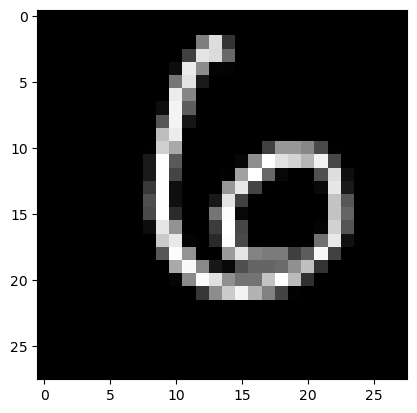

In [44]:
# x is a data point with C*H*W shape
n=100
x= x_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)

# convert to torch.float32
x=x.type(torch.float)

# move to cuda device
x=x.to(device)

# get model output
output=_model(x)

# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print (pred.item(),y.item())